C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


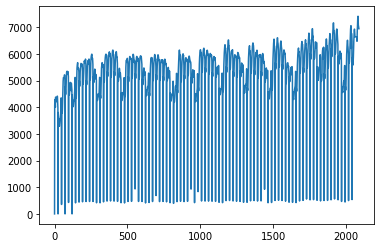

Fit ARIMA: order=(1, 0, 1); AIC=35111.029, BIC=35133.605, Fit time=0.660 seconds
Fit ARIMA: order=(0, 0, 0); AIC=35522.693, BIC=35533.981, Fit time=0.058 seconds
Fit ARIMA: order=(1, 0, 0); AIC=35253.733, BIC=35270.665, Fit time=0.069 seconds
Fit ARIMA: order=(0, 0, 1); AIC=35327.290, BIC=35344.222, Fit time=0.023 seconds
Fit ARIMA: order=(2, 0, 1); AIC=35111.677, BIC=35139.897, Fit time=0.986 seconds
Fit ARIMA: order=(1, 0, 2); AIC=35111.496, BIC=35139.715, Fit time=1.058 seconds
Fit ARIMA: order=(2, 0, 2); AIC=35112.535, BIC=35146.399, Fit time=0.911 seconds
Total fit time: 3.821 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2088
Model:                     ARMA(1, 1)   Log Likelihood              -17551.515
Method:                       css-mle   S.D. of innovations           1082.336
Date:                Wed, 01 Apr 2020   AIC                          35111.029
Time:   

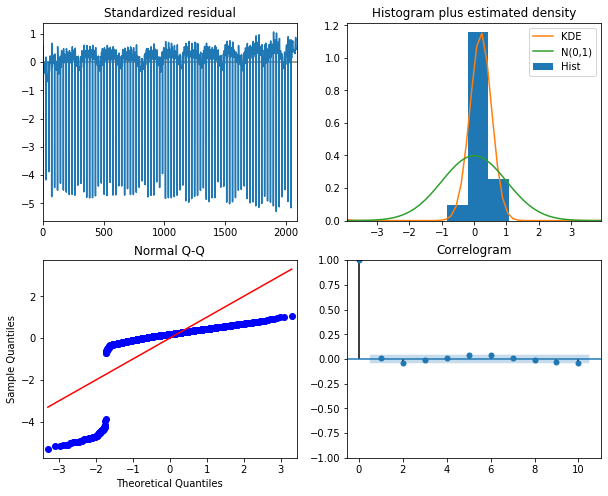

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras import regularizers
from keras.constraints import maxnorm
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA, ARIMA
from sklearn import preprocessing
import pmdarima as pm


# The models were done by hour using all the days of the week
data = pd.read_excel("C:/Users/ERIC/Desktop/PML-06MTP-115/06MTP 01012020.xlsm",squeeze=True, sheet_name = 0)

demand = data.iloc[:,4].values

# Plot all the data
plt.figure()
plt.plot(demand)
plt.show()
model = pm.auto_arima(demand, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())
model.plot_diagnostics(figsize=(10,8))
plt.show()

predicted=6096.521198, expected=6929.000000
predicted=6168.175975, expected=6922.000000
predicted=6214.358045, expected=6826.670000
predicted=6224.940294, expected=6674.080000
predicted=6200.171630, expected=6639.920000
predicted=6180.092632, expected=6638.000000
predicted=6168.080603, expected=6638.000000
predicted=6160.068434, expected=6638.000000
predicted=6154.871893, expected=6638.000000
predicted=6152.000612, expected=6638.000000
predicted=6150.406992, expected=6638.000000
predicted=6149.239822, expected=6638.000000
predicted=6149.577411, expected=6638.000000
predicted=6149.666141, expected=6638.000000
predicted=6150.521285, expected=6638.000000
predicted=6151.327937, expected=6638.000000
predicted=6152.479076, expected=6638.000000
predicted=6153.086723, expected=6534.670000
predicted=6130.255203, expected=6473.830000
predicted=6103.923935, expected=6738.420000
predicted=6150.446251, expected=6901.500000
predicted=6212.427633, expected=6999.000000
predicted=6273.697436, expected=

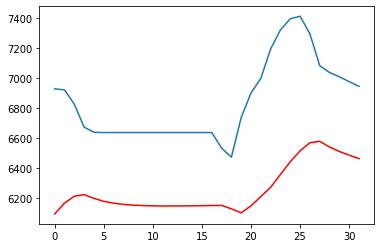

,Pred
0,6096.521198
1,6168.175975
2,6214.358045
3,6224.940294
4,6200.171630
5,6180.092632
6,6168.080603
7,6160.068434
8,6154.871893
9,6152.000612


In [35]:
size = int(len(demand) * 0.985) 
train, test = demand[0:size], demand[size:len(demand)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARMA(history, order=(2,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print(len(predictions))

for i in range(len(predictions)):
    pred = pd.DataFrame(predictions)
pred.columns = ['Pred']
# predictions = pd.DataFrame(predictions)
# predictions.columns = ['Predictions']
# history = pd.DataFrame(history)
# history.columns = ['Expected']
# values = pd.concat(predictions, history)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
pred

In [36]:
model = ARMA(demand, order=(2,1))
model_fit2 = model.fit(disp=0)
forecast_demand = model_fit2.forecast(steps = 48)
forecast_demand = pd.DataFrame(forecast_demand[0])
forecast_demand.columns = ['Demand Predicted']
forecast_demand

,Demand Predicted
0,6442.366781
1,6307.651210
2,6200.139389
3,6104.204242
4,6018.117068
5,5940.846432
6,5871.488528
7,5809.233034
8,5753.352644
9,5703.194534


In [38]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(demand, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=33858.414, BIC=33886.605, Fit time=21.140 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=36667.888, BIC=36679.164, Fit time=0.282 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=28561.091, BIC=28583.644, Fit time=5.553 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=34148.735, BIC=34171.288, Fit time=13.590 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=36448.891, BIC=36465.806, Fit time=0.591 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 0, 12); AIC=30014.444, BIC=30042.635, Fit time=24.505 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 1, 12); AIC=28563.737, BIC=28591.928, Fit time=13.758 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 1, 12); AIC=32798.202, BIC=32832.031, Fit time=21.761 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=32077.919, BIC=32094.833, Fit time=8.700 seconds
Fit A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2088
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 12)   Log Likelihood              -14167.656
Date:                            Wed, 01 Apr 2020   AIC                          28345.311
Time:                                    23:44:05   BIC                          28373.502
Sample:                                         0   HQIC                         28355.643
                                           - 2088                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0020      5.639      0.000      1.000     -11.051      11.055
ar.L1          0.6805      0.002    272.455      0.000       0.676       0.685
ar.L2          0.3195      0.002    139.384      0.000       0.315       0.324
ar.S.L12      -1.0000      0.001   -707.278      0.000      -1.003      -0.997
sigma2      4.755e+04      0.043   1.11e+06      0.000    4.76e+04    4.76e+04
===================================================================================
Ljung-Box (Q):                       99.20   Jarque-Bera (JB):           7000342.99
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.21   Skew:                             7.38
Prob(H) (two-sided):                  0.00   Kurtosis:                       287.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.65e+20. Standard errors may be unstable.
"""

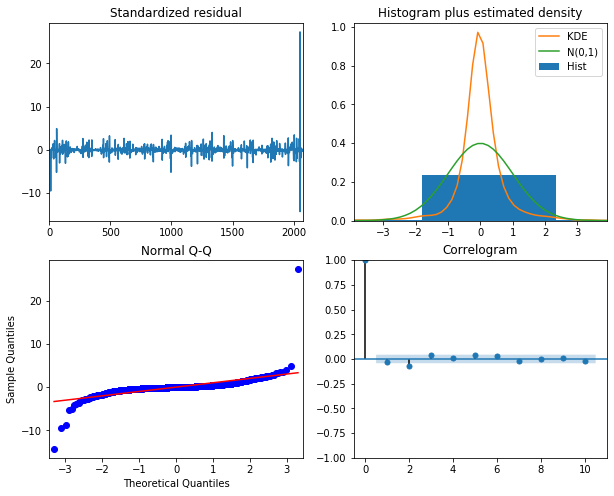

In [39]:
smodel.plot_diagnostics(figsize=(10,8))
plt.show()

predicted=6920.269714, expected=6929.000000
predicted=6921.471350, expected=6922.000000
predicted=6265.612734, expected=6826.670000
predicted=6533.859265, expected=6674.080000
predicted=7220.763117, expected=6639.920000
predicted=6684.114055, expected=6638.000000
predicted=6472.336909, expected=6638.000000
predicted=6514.269362, expected=6638.000000
predicted=704.179767, expected=6638.000000
predicted=10464.220039, expected=6638.000000
predicted=9009.282555, expected=6638.000000
predicted=6528.804938, expected=6638.000000
predicted=6446.988095, expected=6638.000000
predicted=6509.674452, expected=6638.000000
predicted=6562.600366, expected=6638.000000
predicted=6594.901516, expected=6638.000000
predicted=6691.950174, expected=6638.000000
predicted=6776.997031, expected=6534.670000
predicted=6815.066743, expected=6473.830000
predicted=6741.085247, expected=6738.420000
predicted=6835.311535, expected=6901.500000
predicted=7012.403906, expected=6999.000000
predicted=7124.442061, expected=

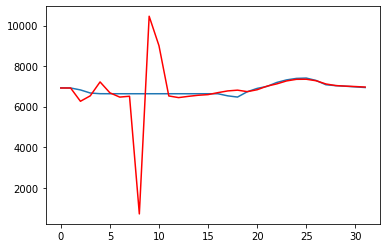

,Pred
0,6920.269714
1,6921.471350
2,6265.612734
3,6533.859265
4,7220.763117
5,6684.114055
6,6472.336909
7,6514.269362
8,704.179767
9,10464.220039


In [43]:
import statsmodels.api as sm
size = int(len(demand) * 0.985) 
train, test = demand[0:size], demand[size:len(demand)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = sm.tsa.statespace.SARIMAX(history,order=(2,0,0),seasonal_order=(1,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print(len(predictions))

for i in range(len(predictions)):
    pred = pd.DataFrame(predictions)
pred.columns = ['Pred']
# predictions = pd.DataFrame(predictions)
# predictions.columns = ['Predictions']
# history = pd.DataFrame(history)
# history.columns = ['Expected']
# values = pd.concat(predictions, history)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
pred

In [45]:
model = sm.tsa.statespace.SARIMAX(history,order=(2,0,0),seasonal_order=(1,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
model_fit2 = model.fit(disp=0)
forecast_demand = model_fit2.forecast(steps = 48)
forecast_demand = pd.DataFrame(forecast_demand)
forecast_demand.columns = ['Demand Predicted']
forecast_demand

,Demand Predicted
0,6938.196326
1,6923.288582
2,6912.412095
3,6900.728097
4,6889.379810
5,6877.979931
6,6865.853331
7,6853.340318
8,6842.928983
9,6730.812043
